In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_18296/608951304.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('project1.csv')

# Part 1
### Identify shape, size of the raw data (1 point)

In [3]:
data.shape

(131165, 12)

Initial shape of the dataset is 12 columns and 131165 entries. 

In [4]:
data.size

1573980

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131165 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131165 non-null  object
 1   Date of Birth     131165 non-null  object
 2   Name              93658 non-null   object
 3   DateTime          131165 non-null  object
 4   MonthYear         131165 non-null  object
 5   Outcome Type      131125 non-null  object
 6   Outcome Subtype   65810 non-null   object
 7   Animal Type       131165 non-null  object
 8   Sex upon Outcome  131165 non-null  object
 9   Age upon Outcome  131165 non-null  object
 10  Breed             131165 non-null  object
 11  Color             131165 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


In [6]:
data

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
...,...,...,...,...,...,...,...,...,...,...,...,...
131160,A671874,1/31/12,NaN,2014-02-04T10:14:00,Feb-14,Transfer,SCRP,Cat,Intact Male,2 years,Domestic Shorthair Mix,Brown Tabby
131161,A672142,2/4/09,Toby,2014-02-08T10:14:00,Feb-14,Transfer,Partner,Dog,Intact Male,5 years,Pekingese,Red/White
131162,A671565,7/6/13,NaN,2014-02-07T10:14:00,Feb-14,Transfer,SCRP,Cat,Spayed Female,7 months,Domestic Medium Hair Mix,Brown Tabby
131163,A675119,2/16/14,NaN,2014-03-27T08:00:00,Mar-14,Transfer,Partner,Dog,Intact Male,1 month,Pomeranian Mix,White/Brown


### Get information about datatypes. Comment if any of the variables need datatype conversion. Check for duplicate rows and treat them. (1 point)

All of the datatypes were object type, which we also saw above with the data.info command. I did not think that any of the variables needed datatype conversion at this time. Later, we will need to convert Age At Outcome to a continuous numerical variable and one-hot encode categorical variables.  

In [7]:
print(type(data))
print(data['Name'].dtype)
print(data['DateTime'].dtype)
print(data['Outcome Type'].dtype)
print(data['Breed'].dtype)
print(data['Color'].dtype)

<class 'pandas.core.frame.DataFrame'>
object
object
object
object
object


In [8]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
131160    False
131161    False
131162    False
131163    False
131164    False
Length: 131165, dtype: bool

In [9]:
print(data.shape)  
print(data.duplicated().sum()) 

(131165, 12)
17


### Identify missing data and/or invalid values and treat them with suitable mean, median, mode or other method (1 point)

Initially, Name had 37507 null values, Outcome Type had 40 null, and Outcome Subtype had 65535 null. For Name and Outcome Subtype, I replaced null values with the string 'Unknown'. 
For outcome type, I dropped the values that were null. Since outcome type is the target variable, I didn't want to introduce variability. That is why I chose to simply drop those values.

In [10]:
data.isnull().sum()

Animal ID               0
Date of Birth           0
Name                37507
DateTime                0
MonthYear               0
Outcome Type           40
Outcome Subtype     65355
Animal Type             0
Sex upon Outcome        0
Age upon Outcome        0
Breed                   0
Color                   0
dtype: int64

In [11]:
data.fillna({'Name':'Unknown'}, inplace=True)     
# modeOT = data['Outcome Type'].mode()[0]
# data.dropna({'Outcome Type': modeOT}, inplace=True)
data.fillna({'Outcome Subtype':'Unknown'}, inplace=True)
data.dropna(subset=['Outcome Type'], inplace=True)

In [12]:
data['Name']

0         Unknown
1         Unknown
2         Unknown
3         Unknown
4         Unknown
           ...   
131160    Unknown
131161       Toby
131162    Unknown
131163    Unknown
131164     Gatsby
Name: Name, Length: 131125, dtype: object

In [13]:
data['Outcome Type']

0         Transfer
1         Transfer
2         Transfer
3         Transfer
4         Transfer
            ...   
131160    Transfer
131161    Transfer
131162    Transfer
131163    Transfer
131164    Transfer
Name: Outcome Type, Length: 131125, dtype: object

In [14]:
data.isnull().sum()

Animal ID           0
Date of Birth       0
Name                0
DateTime            0
MonthYear           0
Outcome Type        0
Outcome Subtype     0
Animal Type         0
Sex upon Outcome    0
Age upon Outcome    0
Breed               0
Color               0
dtype: int64

In [15]:
print("Animal ID:", data['Animal ID'].unique()) 
print("Date of Birth", data['Date of Birth'].unique()) 
print("Name", data['Name'].unique()) 
print("DateTime", data['DateTime'].unique()) 
print("MonthYear", data['MonthYear'].unique()) 
print("Outcome Type", data['Outcome Type'].unique())
print("Outcome Subtype", data['Outcome Subtype'].unique())
print("Animal Type", data['Animal Type'].unique()) 
print("Sex upon Outcome", data['Sex upon Outcome'].unique())
print("Age upon Outcome", data['Age upon Outcome'].unique())
print("Breed", data['Breed'].unique()) 
print("Color:", data['Color'].unique()) 

Animal ID: ['A680855' 'A680857' 'A680858' ... 'A672142' 'A675119' 'A678559']
Date of Birth ['5/25/14' '4/22/14' '6/12/14' ... '3/9/25' '2/28/25' '3/19/25']
Name ['Unknown' 'Jenny Tyson' '*Stetson' ... '*Gorgeous George' '*Hen' 'Nahtha']
DateTime ['2014-06-10T00:00:00-05:00' '2014-07-11T00:00:00-05:00'
 '2014-07-12T00:00:00-05:00' ... '2014-02-08T10:14:00'
 '2014-02-07T10:14:00' '2014-05-14T08:00:00']
MonthYear ['Jun-14' 'Jul-14' 'Aug-14' 'Sep-14' 'Dec-14' 'Jan-15' 'Feb-15' 'Mar-15'
 'Apr-15' 'May-15' 'Jun-15' 'Jul-15' 'Aug-15' 'Sep-15' 'Oct-15' 'Nov-15'
 'Dec-15' 'Jan-16' 'Feb-16' 'Mar-16' 'Apr-16' 'May-16' 'Jun-16' 'Jul-16'
 'Aug-16' 'Sep-16' 'Oct-16' 'Nov-16' 'Dec-16' 'Jan-17' 'Feb-17' 'Mar-17'
 'Apr-17' 'May-17' 'Jun-17' 'Jul-17' 'Aug-17' 'Sep-17' 'Oct-17' 'Nov-17'
 'Dec-17' 'Jan-18' 'Feb-18' 'Mar-18' 'Apr-18' 'May-18' 'Jun-18' 'Jul-18'
 'Aug-18' 'Sep-18' 'Oct-18' 'Nov-18' 'Dec-18' 'Jan-19' 'Feb-19' 'Mar-19'
 'Apr-19' 'May-19' 'Oct-13' 'Nov-13' 'Dec-13' 'Jan-14' 'Feb-14' 'Mar-14'
 '

Now we have clean data with no null values in the columns. Using the unique command, we can see all the unique values associated with each column. Some of the columns have a lot of different categories that it could be assigned to. 

### Visualize the dataset through different univariate analysis and comment on your observations (2)

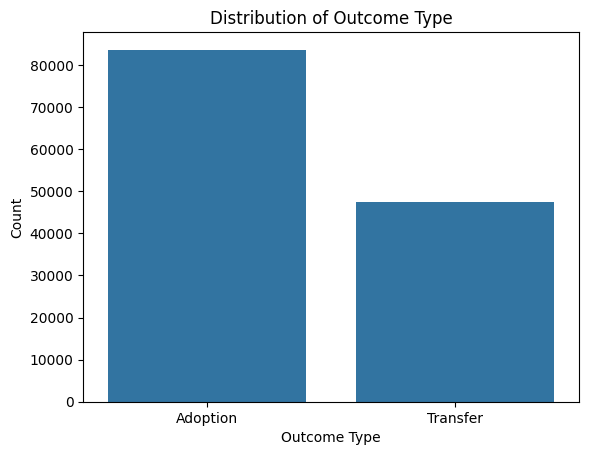

In [16]:
# Outcome Type

plt.figure()
outcome_counts = data['Outcome Type'].value_counts().sort_values(ascending=False)
sns.barplot(x=outcome_counts.index, y=outcome_counts.values) 
plt.title('Distribution of Outcome Type')
plt.ylabel('Count')
plt.show()

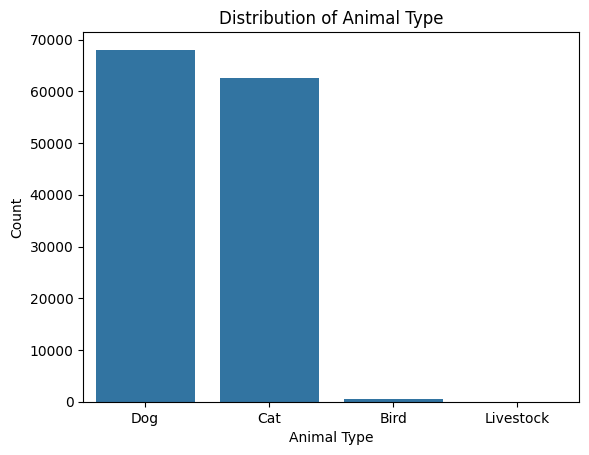

In [17]:
# Animal Type

plt.figure()
outcome_counts = data['Animal Type'].value_counts().sort_values(ascending=False)
sns.barplot(x=outcome_counts.index, y=outcome_counts.values) 
plt.title('Distribution of Animal Type')
plt.ylabel('Count')
plt.show()

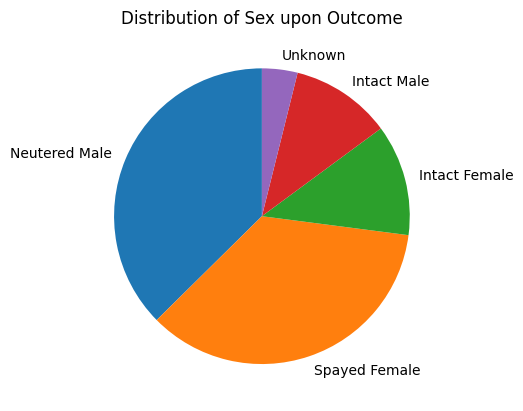

In [18]:
# Sex Upon Outcome

plt.figure()
outcome_counts = data['Sex upon Outcome'].value_counts()
plt.pie(outcome_counts, labels=outcome_counts.index, startangle=90) 
plt.title('Distribution of Sex upon Outcome')
plt.show()

### Drop duplicate rows and irrelevant columns. (1 point)

First, we dropped irrelevant columns. 
- Animal ID was an irrelevant column that would not help our analysis because we already have index values associated with each of the animals.
- Date of Birth and DateTime were redundant columns, instead we just kept MonthYear and Age at Outcome. MonthYear will later be made into a categorical variable, and Age at Outcome a numerical value.
- Outcome Subtype was dropped because it just specified the Outcome Type variable, so it could have caused overfitting later.  
- I also dropped Name, Breed, and Color because those three were high cardinality variables, meaning that there were a lot of different options for the categories the variable could be assigned to. Since we plan on doing one-hot encoding later, this would cause a lot of columns to be created, which might delay analysis later. 

There were also 58807 duplicated rows. This was also dropped with the drop_duplicates method and then confirmed. 

In [19]:
columns_d = ['Animal ID', 'DateTime', 'Date of Birth', 'Outcome Subtype', 'Name', 'Color', 'Breed']

data_clean = data.drop(columns=columns_d, inplace=True)

In [20]:
data.duplicated().sum()

103986

In [21]:
data.drop_duplicates(inplace=True, ignore_index=True)

In [22]:
data.duplicated().sum()

0

In [23]:
data.head()

,MonthYear,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome
0,Jun-14,Transfer,Bird,Unknown,2 weeks
1,Jul-14,Adoption,Dog,Spayed Female,2 months
2,Jul-14,Transfer,Bird,Unknown,4 weeks
3,Jul-14,Transfer,Bird,Unknown,2 weeks
4,Aug-14,Transfer,Bird,Intact Male,5 months


### Convert all data to numeric and/or categorical data types. Hint: Make the Age at Outcome column a float by converting all values to one unit for example days. (1 point)

Data Type Conversion
- Will convert age (currently a string) to a float that represents the total days.
- All other columns are already categorical

In [24]:
# ChatGPT helped me write this function 
def age_to_days(age_str):
    age_str = age_str.lower().strip()
    try:
        value, unit = age_str.split(' ', 1)
        value = float(value)
    except ValueError:
        return np.nan

    if 'day' in unit:
        return value
    elif 'week' in unit:
        return value * 7
    elif 'month' in unit:
        return value * 30  
    elif 'year' in unit:
        return value * 365 
    else:
        return np.nan

data['Age in Days'] = data['Age upon Outcome'].apply(age_to_days)
data.drop(columns=['Age upon Outcome'], inplace=True)

In [25]:
data.head()

,MonthYear,Outcome Type,Animal Type,Sex upon Outcome,Age in Days
0,Jun-14,Transfer,Bird,Unknown,14.0
1,Jul-14,Adoption,Dog,Spayed Female,60.0
2,Jul-14,Transfer,Bird,Unknown,28.0
3,Jul-14,Transfer,Bird,Unknown,14.0
4,Aug-14,Transfer,Bird,Intact Male,150.0


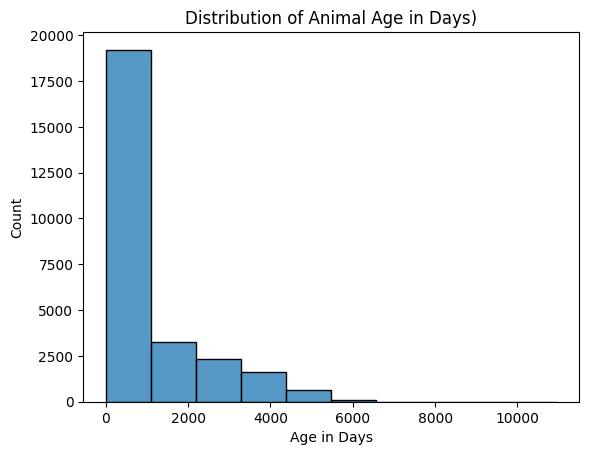

In [26]:
plt.figure()
sns.histplot(x=data['Age in Days'],  bins=10)

plt.title('Distribution of Animal Age in Days)')
plt.show()

### Perform one-hot encoding on categorical variables (1 point)

To prepare for model analysis later, the dataframe was one-hot encoded for all the categorical variables. This included Outcome Type, Animal Type, Sex upon Outcome, MonthYear, and Breed. Age in Days was already a numerical value. 

In [27]:
cols_r = ['Outcome Type', 'Animal Type', 'Sex upon Outcome', 'MonthYear']
data_ohe = pd.get_dummies(data, columns=cols_r, drop_first=True)

print(f"Shape after One Hot Encoding: {data_ohe.shape}")
data_ohe.head()

Shape after One Hot Encoding: (27139, 148)


,Age in Days,Outcome Type_Transfer,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,MonthYear_Apr-15,...,MonthYear_Sep-15,MonthYear_Sep-16,MonthYear_Sep-17,MonthYear_Sep-18,MonthYear_Sep-19,MonthYear_Sep-20,MonthYear_Sep-21,MonthYear_Sep-22,MonthYear_Sep-23,MonthYear_Sep-24
0,14.0,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,60.0,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,28.0,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,14.0,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,150.0,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27139 entries, 0 to 27138
Columns: 148 entries, Age in Days to MonthYear_Sep-24
dtypes: bool(147), float64(1)
memory usage: 4.0 MB


# Part 2

In [29]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

### First, drop the Breed column, as it will complicate the analysis here in Part 3.

Breed was dropped earlier!

In [30]:
data_ohe.head()

,Age in Days,Outcome Type_Transfer,Animal Type_Cat,Animal Type_Dog,Animal Type_Livestock,Sex upon Outcome_Intact Male,Sex upon Outcome_Neutered Male,Sex upon Outcome_Spayed Female,Sex upon Outcome_Unknown,MonthYear_Apr-15,...,MonthYear_Sep-15,MonthYear_Sep-16,MonthYear_Sep-17,MonthYear_Sep-18,MonthYear_Sep-19,MonthYear_Sep-20,MonthYear_Sep-21,MonthYear_Sep-22,MonthYear_Sep-23,MonthYear_Sep-24
0,14.0,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,60.0,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,28.0,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,14.0,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,150.0,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
data_ohe.columns

Index(['Age in Days', 'Outcome Type_Transfer', 'Animal Type_Cat',
       'Animal Type_Dog', 'Animal Type_Livestock',
       'Sex upon Outcome_Intact Male', 'Sex upon Outcome_Neutered Male',
       'Sex upon Outcome_Spayed Female', 'Sex upon Outcome_Unknown',
       'MonthYear_Apr-15',
       ...
       'MonthYear_Sep-15', 'MonthYear_Sep-16', 'MonthYear_Sep-17',
       'MonthYear_Sep-18', 'MonthYear_Sep-19', 'MonthYear_Sep-20',
       'MonthYear_Sep-21', 'MonthYear_Sep-22', 'MonthYear_Sep-23',
       'MonthYear_Sep-24'],
      dtype='object', length=148)

### Split the data into training and test datasets. Make sure your split is reproducible and that it maintains roughly the proportion of each class of dependent variable. (1 point)


I chose to set aside 30% of my data as testing data, and 70% as my training data. To ensure my split was reproducible, I set random_state=42. Additionally, the stratify=y ensured that the selected data maintains the proportion of the dependent variables. 

In [32]:
X = data_ohe.drop(columns=['Outcome Type_Transfer']) 
y = data_ohe['Outcome Type_Transfer']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Shape of Training Data: {X_train.shape[0]} samples")
print(f"Shape of Testing Data: {X_test.shape[0]} samples")

Shape of Training Data: 18997 samples
Shape of Testing Data: 8142 samples


### Perform classification to predict using OutcomeType (4 points)
- K-Nearest Neighbor Classifier (1 point)
- K-Nearest Neighbor Classifier using Grid search CV (2 points)
- Linear classification (1 point)

These models took a while to run because of the numbers of the samples in my X_train and X_test.

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_report = classification_report(y_test, y_pred)
knn_accuracy_score = accuracy_score(y_test, y_pred)

print(f"KNN Accuracy: {knn_accuracy_score:.3f}")

KNN Accuracy: 0.598


In [34]:
param_grid = {"n_neighbors": np.arange(1, 20)}

knn_gscv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
knn_gscv.fit(X_train, y_train)

best_k = knn_gscv.best_params_['n_neighbors']
print(f"Best K value: {best_k}")

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

y_pred_best_knn = best_knn.predict(X_test)
knn_gscv_report = classification_report(y_test, y_pred_best_knn)
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)

print(f"Best KNN Accuracy: {accuracy_best_knn:.2f}")

Best K value: 19
Best KNN Accuracy: 0.69


In [35]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
log_report = classification_report(y_test, y_pred_log)
log_accuracy = accuracy_score(y_test, y_pred_log)

print(f"Logistic Regression Accuracy: {log_accuracy:.2f}")

Logistic Regression Accuracy: 0.72


In [44]:
from sklearn.svm import LinearSVC

lscv = LinearSVC(dual='auto')
lscv.fit(X_train, y_train)


y_pred_lscv = lscv.predict(X_test)
lscv_report = classification_report(y_test, y_pred_lscv)
lscv_accuracy = accuracy_score(y_test, y_pred_lscv)

print(f"Linear SVC Accuracy: {lscv_accuracy:.2f}")

Linear SVC Accuracy: 0.72


### Print report showing accuracy, recall, precision and f1-score for each classification model. Which metric is most important for this problem? (You will explain your answer in the report in Part 3). ( 2 points)

In [45]:
print("KNN Classification Report:")
print(knn_report)

print("Best KNN Classification Report (Grid Search CV):")
print(knn_gscv_report)

print("Logistic Regression Classification Report:")
print(log_report)

print("Linear SVC Classification Report:")
print(lscv_report)

KNN Classification Report:
              precision    recall  f1-score   support

       False       0.57      0.55      0.56      3747
        True       0.62      0.64      0.63      4395

    accuracy                           0.60      8142
   macro avg       0.59      0.59      0.59      8142
weighted avg       0.60      0.60      0.60      8142

Best KNN Classification Report (Grid Search CV):
              precision    recall  f1-score   support

       False       0.65      0.71      0.68      3747
        True       0.73      0.68      0.70      4395

    accuracy                           0.69      8142
   macro avg       0.69      0.69      0.69      8142
weighted avg       0.69      0.69      0.69      8142

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.65      0.84      0.73      3747
        True       0.81      0.62      0.70      4395

    accuracy                           0.72      8142
   macro 

Text(0.5, 23.52222222222222, 'Predicted Outcome Type')

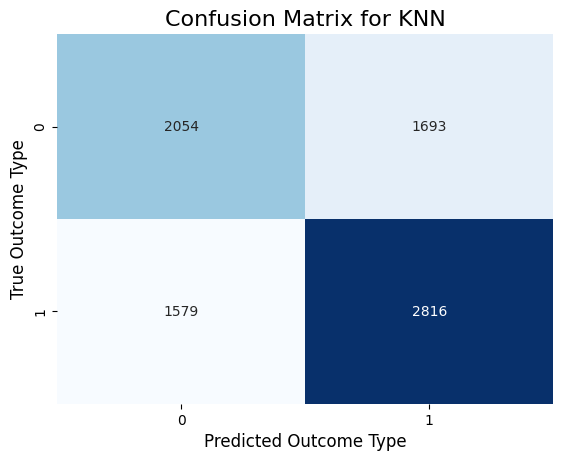

In [46]:
# See [1]. ChatGPT helped me fix the syntax for this code. 
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix for KNN', fontsize=16)
plt.ylabel('True Outcome Type', fontsize=12)
plt.xlabel('Predicted Outcome Type', fontsize=12)

Text(0.5, 23.52222222222222, 'Predicted Outcome Type')

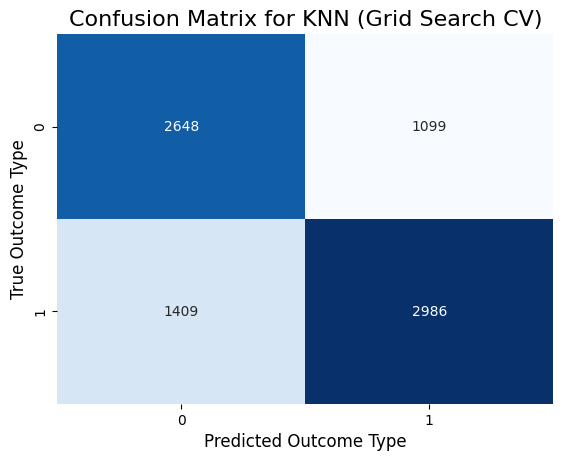

In [47]:
cm = confusion_matrix(y_test, y_pred_best_knn)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix for KNN (Grid Search CV)', fontsize=16)
plt.ylabel('True Outcome Type', fontsize=12)
plt.xlabel('Predicted Outcome Type', fontsize=12)

Text(0.5, 23.52222222222222, 'Predicted Outcome Type')

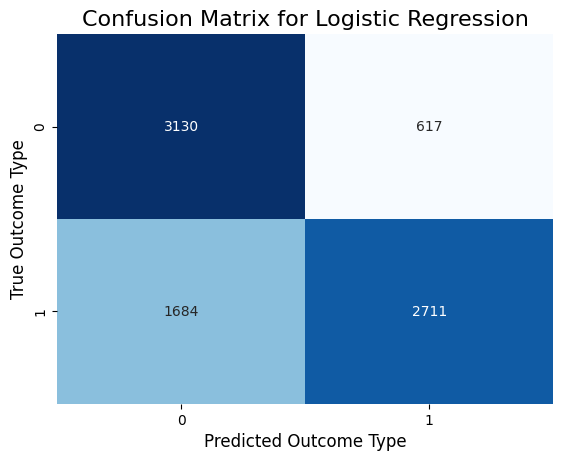

In [48]:
cm = confusion_matrix(y_test, y_pred_log)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix for Logistic Regression', fontsize=16)
plt.ylabel('True Outcome Type', fontsize=12)
plt.xlabel('Predicted Outcome Type', fontsize=12)

Text(0.5, 23.52222222222222, 'Predicted Outcome Type')

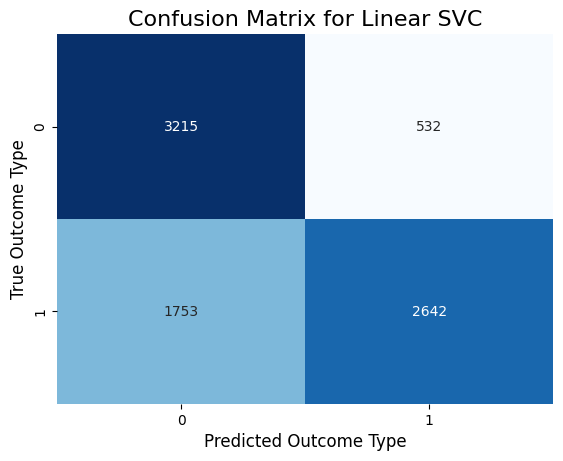

In [50]:
cm = confusion_matrix(y_test, y_pred_lscv)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix for Linear SVC', fontsize=16)
plt.ylabel('True Outcome Type', fontsize=12)
plt.xlabel('Predicted Outcome Type', fontsize=12)

The most important metric for this problem is accuracy. Accuracy will allow us to determine the predictive performance overall and the model's ability to distinguish true positives and true negative correctly.